# Importing Libraries and modules


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define path of signatures

In [2]:
genuine_image_path = "C:\\Users\\Vikesh\\Desktop\\Dataset2\\real/"
forged_image_path = "C:\\Users\\Vikesh\\Desktop\\Dataset2\\forged/"

# Preprocessing the image

In [3]:
def load_images(genuine_path, forged_path):
    data = []
    labels = []

    for file in os.listdir(genuine_path):
        if file.endswith(".png"):
            img = io.imread(os.path.join(genuine_path, file), as_gray=True)
            img = transform.resize(img, (128, 128))
            data.append(img)
            labels.append(1)

    for file in os.listdir(forged_path):
        if file.endswith(".png"):
            img = io.imread(os.path.join(forged_path, file), as_gray=True)
            img = transform.resize(img, (128, 128))
            data.append(img)
            labels.append(0)

    data = np.array(data)
    data = data.reshape((data.shape[0], 128, 128, 1))
    labels = np.array(labels)

    return data, labels

## Define the CNN model

In [4]:
data, labels = load_images(genuine_image_path, forged_image_path)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [5]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
4/4 [==============================] - 3s 379ms/step - loss: 1.3982 - accuracy: 0.5333 - val_loss: 0.9763 - val_accuracy: 0.5333
Epoch 2/30
4/4 [==============================] - 1s 308ms/step - loss: 0.9042 - accuracy: 0.5583 - val_loss: 0.7812 - val_accuracy: 0.4667
Epoch 3/30
4/4 [==============================] - 1s 307ms/step - loss: 0.7701 - accuracy: 0.4083 - val_loss: 0.6941 - val_accuracy: 0.4667
Epoch 4/30
4/4 [==============================] - 1s 306ms/step - loss: 0.6944 - accuracy: 0.4833 - val_loss: 0.6934 - val_accuracy: 0.4667
Epoch 5/30
4/4 [==============================] - 1s 307ms/step - loss: 0.6940 - accuracy: 0.4583 - val_loss: 0.6931 - val_accuracy: 0.5333
Epoch 6/30
4/4 [==============================] - 1s 308ms/step - loss: 0.6931 - accuracy: 0.4833 - val_loss: 0.6929 - val_accuracy: 0.5333
Epoch 7/30
4/4 [==============================] - 1s 315ms/step - loss: 0.6930 - accuracy: 0.4917 - val_loss: 0.6929 - val_accuracy: 0.5333
Epoch 8/30
4/4 [====

# Plot learning curve for model

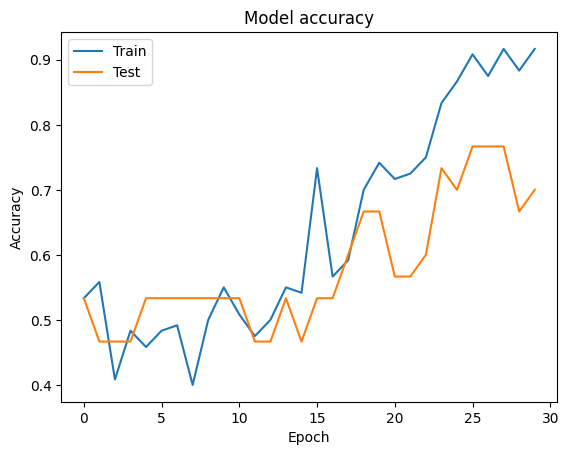

In [6]:
# plot learning curve
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_learning_curve(history)

# Test  and evaluate the Model

In [14]:
def predict_signature(model, img_path):
    img = io.imread(img_path, as_gray=True)
    img = transform.resize(img, (128, 128))
    img = np.array(img)
    img = img.reshape((1, 128, 128, 1))
    prediction = model.predict(img)
    print("Accuracy: ", prediction)
    return prediction[0][0] > 0.5

# Test the model with an example
# person_id = "001"
# image_path = "C:\\Users\\Vikesh\\Desktop\\Dataset2\\test\\001_001_000.png"
# result = predict_signature(model, image_path)
# print("Genuine" if result else "Forged")

# Function to evaluate model's accuracy on test data
def evaluate_model_accuracy(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print("Test accuracy:", test_accuracy)

evaluate_model_accuracy(model, X_test, y_test)

# User input for person_id and image_path
person_id = input("Enter person ID (e.g., 001): ")
image_path = input("Enter image path (e.g., C:\\Users\\Vikesh\\Desktop\\Dataset2\\real\\001001_000.png): ")

# validating person_id and image_path
# while True:
#     person_id = input("Enter person ID (e.g., 001): ")
#     if person_id.isdigit() and 1 <= int(person_id) <= 15 and len(person_id) == 3:
#         break
#     else:
#         print("Person ID should be a number between 001 to 015.")

# while True:
#     image_path = input("Enter image path (e.g., C:\\Users\\Vikesh\\Desktop\\Dataset2\\real\\001001_000.png): ")
#     if os.path.exists(image_path):
#         filename = os.path.basename(image_path)
#         parts = filename.split("_")
#         if len(parts) == 2:
#             yyy = parts[0][-3:]
#             zzz = parts[1][:-4]
#             if yyy == person_id and zzz.isdigit() and 0 <= int(zzz) <= 4:
#                 if "real" in image_path or "forged" in image_path:
#                     if int(person_id) <= 15 and yyy in ["001", "002", "003", "004", "005", "006", "007", "008", "009", "010", "011", "012", "013", "014", "015", "021"]:
#                         break
                        
#     print("Image path should be in the format: C:\\Users\\Vikesh\\Desktop\\Dataset2\\real\\XXXYYY_ZZZ.png or C:\\Users\\Vikesh\\Desktop\\Dataset2\\forged\\XXXYYY_ZZZ.png where YYY is same as person ID and ZZZ is 000 to 004 and XXX is either 001-015 or 021.")    

result = predict_signature(model, image_path)
print("Genuine" if result else "Forged")

1/1 [==============================] - 0s 95ms/step - loss: 0.5321 - accuracy: 0.7000
Test accuracy: 0.699999988079071
Enter person ID (e.g., 001): 006
Enter image path (e.g., C:\Users\Vikesh\Desktop\Dataset2\real\001001_000.png): C:\Users\Vikesh\Desktop\Dataset2\forged\021006_003.png
1/1 [==============================] - 0s 28ms/step
Accuracy:  [[0.04314137]]
Forged


In [ ]:
C:\Users\Vikesh\Desktop\Dataset2\real\015015_000.png

In [ ]:
C:\Users\Vikesh\Desktop\Dataset2\forged\021001_002.png